Enter the start date, end date, and site with a space between each: 3/5/2021 3/15/2021 08048000
2021-03-05
2021-03-15
Average values for each day: 
            Water Temp(C)  Air Temp(F)  Wind Speed(MPH)  Discharge(ft^3/sec)  \
Date                                                                           
2021-03-11      16.967708    72.947917         5.865625            41.583333   
2021-03-12      17.709375    72.862500         4.938542            75.179167   
2021-03-13      18.156250    71.112500         5.730208            92.328125   
2021-03-14      18.366304    64.550000         5.729348            90.273913   
2021-03-15      18.395833    66.104167         5.314583            51.843750   

            Water Temp(F)  
Date                       
2021-03-11      62.541875  
2021-03-12      63.876875  
2021-03-13      64.681250  
2021-03-14      65.059348  
2021-03-15      65.112500  

Max values: 
Date                   2021-03-15
Water Temp(C)                19.5
Air Temp(F)  

Text(0.5, 1.0, 'W Fk Trinity Rv at Ft Worth, TX')

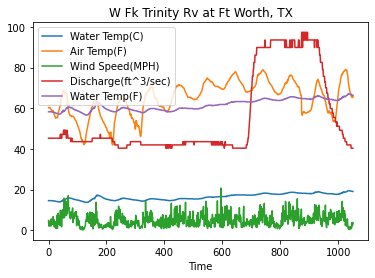

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import math
import datetime as dt
import pandas as pd
import statistics
from pandas_datareader import data, wb
from suds.client import Client
from scipy.integrate import odeint
from sympy import *
init_printing()
%matplotlib inline

#Getting user input and formatting for future use
userIn = input("Enter the start date, end date, and site with a space between each: ")
userList = userIn.split()
begDate = userList[0].split("/")
endDate = userList[1].split("/")
site = userList[2]
if(len(begDate[0]) == 1):
    begDate[0] = '0' + begDate[0]
if(len(begDate[1]) == 1):
    begDate[1] = '0' + begDate[1]
if(len(endDate[0]) == 1):
    endDate[0] = '0' + endDate[0]
if(len(endDate[1]) == 1):
    endDate[1] = '0' + endDate[1]
bDate = begDate[2] + '-' + begDate[0] + '-' + begDate[1]
eDate = endDate[2] + '-' + endDate[0] + '-' + endDate[1]

print(bDate)
print(eDate)

#Setting up ability to connect to site
siteCode = 'NWISUV:' + site
celCode = 'NWISUV:00010'
airCode = 'NWISUV:00021'
windCode = 'NWISUV:00035'
disCode = 'NWISUV:00060'
NWIS = Client('http://hydroportal.cuahsi.org/nwisuv/cuahsi_1_1.asmx?WSDL').service

#Get site name
response = NWIS.GetSiteInfoObject(siteCode)
siteName = response.site[0].siteInfo.siteName

#Water Temp in Celcius
response = NWIS.GetValuesObject(siteCode, celCode, bDate, eDate) 
if not (Client.dict(response)['timeSeries'][0]):
    sys.exit()
try:
    getattr ( response.timeSeries[0].values[0] ,  'value')
except AttributeError:
    print ("No value" )
else:
    values = response.timeSeries[0].values[0].value
    myCelValues=[]
    myCDates = []
    for v in values:
        myCelValues.append(float(v.value))
        myCDates.append(v._dateTime.date())

#Air Temperature in Farenheit
response = NWIS.GetValuesObject(siteCode, airCode, bDate, eDate) 
if not (Client.dict(response)['timeSeries'][0]):
    sys.exit()
try:
    getattr ( response.timeSeries[0].values[0] ,  'value')
except AttributeError:
    print ("No value" )
else:
    values = response.timeSeries[0].values[0].value
    myAirValues=[]
    myADates = []
    for v in values:
        myAirValues.append(float(v.value))
        myADates.append(v._dateTime.date())

#Wind Speed in MPH
response = NWIS.GetValuesObject(siteCode, windCode, bDate, eDate) 
if not (Client.dict(response)['timeSeries'][0]):
    sys.exit()
try:
    getattr ( response.timeSeries[0].values[0] ,  'value')
except AttributeError:
    print ("No value" )
else:
    values = response.timeSeries[0].values[0].value
    myWindValues=[]
    myWDates = []
    for v in values:
        myWindValues.append(float(v.value))
        myWDates.append(v._dateTime.date())
        
#Discharge cube ft per sec
response = NWIS.GetValuesObject(siteCode, disCode, bDate, eDate) 
if not (Client.dict(response)['timeSeries'][0]):
    sys.exit()
try:
    getattr ( response.timeSeries[0].values[0] ,  'value')
except AttributeError:
    print ("No value" )
else:
    values = response.timeSeries[0].values[0].value
    myDisValues=[]
    myDDates = []
    for v in values:
        myDisValues.append(float(v.value))
        myDDates.append(v._dateTime.date())
        
#Creating series of water temp in Farenheit
myFarValues=[]
for d in myCelValues:
    myFarValues.append(float(d)*(9.0/5.0) + 32.0)
        
#Creating DataFrame and printing tail of daily averages
df = pd.DataFrame({'Date':myCDates, 'Water Temp(C)':myCelValues, 'Air Temp(F)':myAirValues, 'Wind Speed(MPH)':myWindValues, 'Discharge(ft^3/sec)':myDisValues, 'Water Temp(F)':myFarValues})
grouped = df.groupby('Date')
print('Average values for each day: ')
print(grouped.aggregate(np.average).tail())

#Print max values
print('')
max = df.apply (lambda x: x.max())
print('Max values: ')
print(max)

#Print min values
print('')
min = df.apply (lambda x: x.min())
print('Min values: ')
print(min)

#Print mean
print('')
mean = df.mean(axis = 0)
print('Mean: ')
print(mean)

#Print standard deviation
print('')
std = df.apply (lambda x: x.std)
print('Standard Deviation: ')
print(std)

#Print tail of rows missing data
null_data = df[df.isnull().any(axis=1)]
print('')
print('Rows missing data: ')
print(null_data.tail())

#Print tail of rows with data as 0
zero_data = df[df.eq(0).any(axis=1)]
print('')
print('Rows where data is 0: ')
print(zero_data.tail())

#Graphing
ax = df.plot()
ax.set_xlabel('Time')
ax.set_title(siteName)

In [1]:
3/5/2021 3/15/2021 08048000

SyntaxError: invalid syntax (<ipython-input-1-4bac57c33648>, line 1)